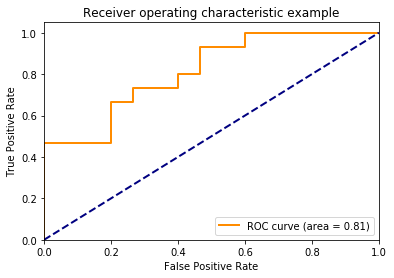

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
  
y_test = np.array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,  0, 1, 0, 0, 0, 1, 1, 1])  
  
y_score = np.array([ 0.17267435,  0.65502116, -0.54222913,  0.3548153 ,  0.0043917 ,  
       -0.20117165,  0.05791453,  0.00383045, -0.15164967,  0.25616448,  
        0.39700001,  0.04521194,  0.33390031, -0.12555765,  0.23799148,  
       -0.36378854, -0.08697789, -0.11682054, -0.25244267, -0.23321231,  
       -0.18097178, -0.10763756, -0.32069159,  0.72074967, -0.29360569,  
       -0.2213709 , -0.32328807, -0.19504498, -0.24365451,  0.37595292])  
  
fpr,tpr,threshold = roc_curve(y_test, y_score)   
roc_auc = auc(fpr,tpr)   
   
fig = plt.figure()  
lw = 2  
ax = fig.add_subplot(111)  
  
ax.plot(fpr, tpr, color='darkorange',  
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)   
ax.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')  
ax.set_xlim([0.0, 1.0])  
ax.set_ylim([0.0, 1.05])  
ax.set_xlabel('False Positive Rate')  
ax.set_ylabel('True Positive Rate')  
ax.set_title('Receiver operating characteristic example')  
ax.legend(loc="lower right")  
plt.show()


Computing PCA projection
Computing t-SNE embedding


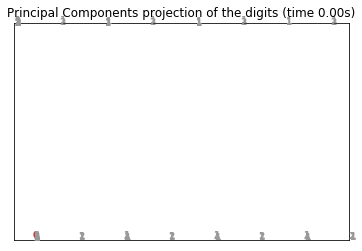

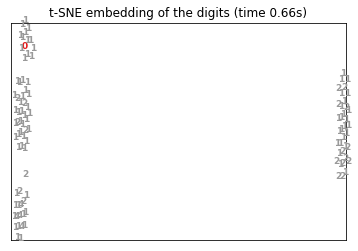

In [13]:
# -*- coding:utf-8 -*-

from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import (manifold, datasets, decomposition)
import os


def load(dir, name_file):
    X = []
    Y = []
    path = os.path.join(dir, name_file)
    file_data = open(path, 'r')
    index = 0
    for line in file_data:
        index += 1
        x = []
        for xi in line.strip().split(',')[:-2]:
            x.append(int(xi))
        x.append(1.0)
        X.append(x)
        Y.append(int(line.strip().split(',')[-1]))
        if (index > 100):
            break
        
    return np.array(X), np.array(Y)


## Function to Scale and visualize the embedding vectors
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    plt.figure()
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(int(y[i]*10)),
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

if __name__ == '__main__':
    X, y = load('/home/demo/bigdata-in-action/data/output-feature-csv/', 'part-00000')
    n_samples, n_features = X.shape
    n_neighbors = 30
    ## Computing PCA
    print("Computing PCA projection")
    t0 = time()
    X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
    plot_embedding(X_pca, y,
                   "Principal Components projection of the digits (time %.2fs)" %
                   (time() - t0))
    ## Computing t-SNE
    print("Computing t-SNE embedding")
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    t0 = time()
    X_tsne = tsne.fit_transform(X)
    plot_embedding(X_tsne, y,
                   "t-SNE embedding of the digits (time %.2fs)" %
                   (time() - t0))
    plt.show()